In [95]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import sklearn.metrics
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

%matplotlib inline

## 1. Data

This data is from one of two files found at https://archive.ics.uci.edu/ml/datasets/student+performance
Each have the same features but the file in use gives math test scores while the other provide language (Portuguese) scores.

##### Data Dictionary


* school        Binary, acronyms for a student's possible schools.
* sex           Binary
* age           Ordered Numeric, values for ages 15 through 22
* address       Binary, distinction between a student's home setting, urban vs rural
* famsize       Binary, distinction between family size of three or fewer and more than three
* Pstatus       Binary, cohabitation status for parents being apart or living together
* Medu          Numeric, values for mother's education level
* Fedu          Numeric, values for father's education level
* Mjob          Nominal Categorical values for mothers's job type
* Fjob          Nominal Categorical values for father's job type
* reason        Nominal Categorical values for student's primary reason in selecting school
* guardian      Nominal Categories for student caretaker
* traveltime    Numeric, travel time between home and school
* studytime     Numeric, weekly average time studied
* failures      Numeric, quantity of previously failed classes
* schoolsup     Binary, whether or not student receives additional educational support
* famsup        Numeric, quality of family educational support
* paid          Binary, whether or not student is paying for related classes
* activities    Binary, whether or not student partakes
* nursery       Binary, attended preschool
* higher        Binary, intends to persue higher education or not
* internet      Binary, has internet access at home or not
* romantic      Binary, in a romantic relationship
* famrel        Numeric, quality of family relationship
* freetime      Numeric, degree of free time after studying
* goout         Numeric, degree of going out with friends
* Dalc          Numeric, degreee of workday alcohol consumption
* Walc          Numeric, degreee of weekend alcohol consumption
* health        Numeric, health status
* absences      Numeric, quantity of absences
* G1            Numeric, range of grades for test 1
* G2            Numeric, range of grades for test 2
* G3            Numeric, range of grades for test 3


data source:
https://archive.ics.uci.edu/ml/datasets/Car+Evaluation

### 1.1 Load & Inspect Data

In [96]:
data = pd.read_csv('../Data/student-mat.csv',sep=';')
# 1.1.1 Inspect Table
data.info(memory_usage='deep')
data.head()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [97]:
shape = data.shape
print(f"The {shape[0]} rows of data have {shape[1]} features. Since this is a classification problem I'll be selecting one to be the target, leaving me with {shape[1]-1} features to work with.\nAt this point it would seem that door and persons are numeric features but I'll check that shortly.")

The 395 rows of data have 33 features. Since this is a classification problem I'll be selecting one to be the target, leaving me with 32 features to work with.
At this point it would seem that door and persons are numeric features but I'll check that shortly.


In [98]:
#check for dupes
print(len(data[data.duplicated()]))

#check for missing
print(data[data.isnull().any(axis=1)])
print(data.isna().sum())

0
Empty DataFrame
Columns: [school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2, G3]
Index: []

[0 rows x 33 columns]
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [99]:
# 1.1.2 Inspect & Modify Columns
data.nunique().sort_values(ascending=False)
# taking note of the range and distribution of the different values for each variable, this may be relevant to encoding.

absences      34
G3            18
G1            17
G2            17
age            8
famrel         5
Fedu           5
Medu           5
Mjob           5
Fjob           5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
failures       4
studytime      4
traveltime     4
reason         4
guardian       3
sex            2
famsize        2
Pstatus        2
address        2
famsup         2
schoolsup      2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
school         2
dtype: int64

In [100]:
# converting everything to lowercase
data.columns = map(str.lower, data.columns)

In [101]:
for i in data.columns:
    print(i)
    print(data[i].value_counts())
    print(data[i].unique(),'\n')

school
GP    349
MS     46
Name: school, dtype: int64
['GP' 'MS'] 

sex
F    208
M    187
Name: sex, dtype: int64
['F' 'M'] 

age
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64
[18 17 15 16 19 22 20 21] 

address
U    307
R     88
Name: address, dtype: int64
['U' 'R'] 

famsize
GT3    281
LE3    114
Name: famsize, dtype: int64
['GT3' 'LE3'] 

pstatus
T    354
A     41
Name: pstatus, dtype: int64
['A' 'T'] 

medu
4    131
2    103
3     99
1     59
0      3
Name: medu, dtype: int64
[4 1 3 2 0] 

fedu
2    115
3    100
4     96
1     82
0      2
Name: fedu, dtype: int64
[4 1 2 3 0] 

mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: mjob, dtype: int64
['at_home' 'health' 'other' 'services' 'teacher'] 

fjob
other       217
services    111
teacher      29
at_home      20
health       18
Name: fjob, dtype: int64
['teacher' 'other' 'services' 'health' 'at_home'] 

reason
course        145
home 

## 2. Initial EDA

### 2.1 Descriptive Stats


In [102]:
data.describe(include='all')

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
count,395,395,395.000000,395,395,395,395.000000,395.000000,395,395,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,349,208,NaN,307,281,354,NaN,NaN,141,217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.696203,NaN,NaN,NaN,2.749367,2.521519,NaN,NaN,...,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,NaN,NaN,1.276043,NaN,NaN,NaN,1.094735,1.088201,NaN,NaN,...,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000


### 2.2 Categorical Features and Associations

In [103]:

#TODO complete this by collecting the most significant colinear features and possibl removing them.
target='g3'
score_dictionary = {}
for i in data.select_dtypes('object').columns:
    feature = pd.crosstab(data[i], data[target])
    # calculate the chi squared statistic and save it as chi2, then print it:
    chi2, pval, dof, expected = chi2_contingency(feature)
    score_dictionary[i] = round(chi2,2)
score_df = pd.DataFrame(score_dictionary.items(), columns=['feature','chi2 score']).sort_values('chi2 score', ascending=False)
score_df[:-1]

,feature,chi2 score
5,mjob,91.94
6,fjob,67.24
7,reason,51.45
9,schoolsup,32.52
16,romantic,30.17
11,paid,29.77
2,address,26.38
8,guardian,24.84
14,higher,24.38
1,sex,20.09


In [104]:
# extracting the top 10 feature names for encoding later.
cat_cols = list(score_df.feature[1:11])
cat_cols

['fjob',
 'reason',
 'schoolsup',
 'romantic',
 'paid',
 'address',
 'guardian',
 'higher',
 'sex',
 'internet']

### 2.3 Numeric Features and Associations


In [142]:
associated = []
for i in data.select_dtypes('number').columns:
    if i == target:
        continue
    else:
        pearson_cor, pval = pearsonr(data[i],data[target])

    if pearson_cor > .3:
        associated.append([i,pearson_cor])

# Extracting column names of the dependent variables that passed the pearson correlation test of being at least .3
num_cols = []
for i in associated:
    num_cols.append(i[0])
num_cols

['g1', 'g2']

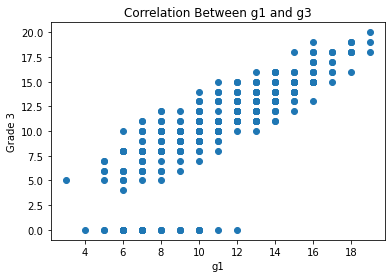

The Pearson Correlation (-1 to +1) is 0.8014679320174141


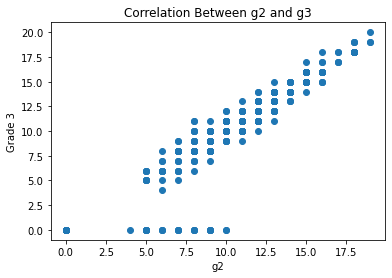

The Pearson Correlation (-1 to +1) is 0.9048679892693011


In [144]:
# Visualizing the relationship between each feature and the target.

for num_col in data[num_cols].columns:
    if num_col == target:
        continue
    plt.scatter(data[num_col],data[target])
    plt.xlabel(str(num_col))
    plt.ylabel('Grade 3')
    plt.title(f'Correlation Between {num_col} and {target}')
    plt.show()
    pearson_cor, pval = pearsonr(data[num_col],data[target])
    print(f'The Pearson Correlation (-1 to +1) is {pearson_cor}')


### 2.2 Visualizing Data

In [146]:
for column in data.columns.tolist():
  
  
  sns.countplot(x=data[column],order=data[column].value_counts().index.sort_values(ascending=True))
  plt.title(column+' Value Counts')
  plt.xticks(rotation=0,fontsize=10)
  plt.xlabel(column,fontsize=12)
  #plt.show()
  plt.clf()
  print(data[column].value_counts())

GP    349
MS     46
Name: school, dtype: int64
F    208
M    187
Name: sex, dtype: int64
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64
U    307
R     88
Name: address, dtype: int64
GT3    281
LE3    114
Name: famsize, dtype: int64
T    354
A     41
Name: pstatus, dtype: int64
4    131
2    103
3     99
1     59
0      3
Name: medu, dtype: int64
2    115
3    100
4     96
1     82
0      2
Name: fedu, dtype: int64
other       141
services    103
at_home      59
teacher      58
health       34
Name: mjob, dtype: int64
other       217
services    111
teacher      29
at_home      20
health       18
Name: fjob, dtype: int64
course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64
mother    273
father     90
other      32
Name: guardian, dtype: int64
1    257
2    107
3     23
4      8
Name: traveltime, dtype: int64
2    198
1    105
3     65
4     27
Name: studytime, dtype: int64
0    312
1  

<Figure size 432x288 with 0 Axes>

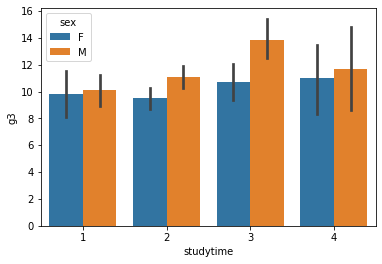

In [147]:
sns.barplot(data=data, x=data.studytime, y="g3", hue='sex')
plt.show()

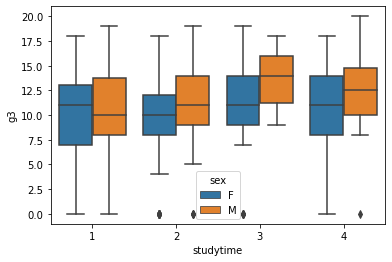

In [148]:
sns.boxplot(data=data, x=data.studytime, y="g3", hue='sex')
plt.show()

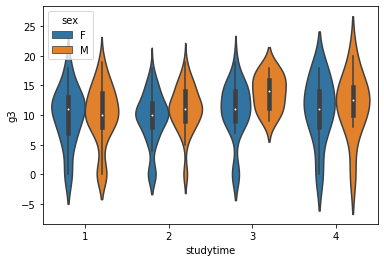

In [149]:
sns.violinplot(data=data, x=data.studytime, y="g3", hue='sex')
plt.show()

In [150]:

# This 3D plot indicates that a greater number of absences is assocated with lower G1 and G3 scores yet seem to have little impact on G2.
# This could be due to the semester being in full swing by this test whereas there are generally many absences at the start of the term, and also,
# absences throughout the term may have greater impact on the final score which is cumulative and requires retention.
fig = px.scatter_3d(data, x='g1', y='g2', z='g3', color='absences')
fig.show()

NameError: name 'px' is not defined

In [151]:
# Visualizing all scores against each other with a hue of studytime reveals a distinct trajectory where studytime stronglyzcorelates to higher test scores as can be observed along each axis.
fig = px.scatter_3d(data, x='g1', y='g2', z='g3', color='studytime')
fig.show()

NameError: name 'px' is not defined

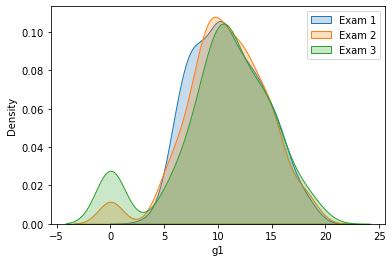

In [152]:
# THis KDE plot is helpful in understanding the the distribution of scores and the severity of the 0 values.

sns.kdeplot(data.g1, shade=True, label="Exam 1")
sns.kdeplot(data.g2, shade=True, label="Exam 2")
sns.kdeplot(data.g3, shade=True, label="Exam 3")

plt.legend()
plt.show()

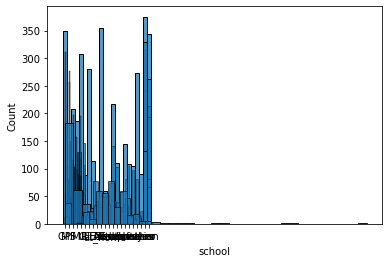

In [153]:
#TODO
# replace this with a viz for each variable.
for i in data.columns:
    ax = sns.histplot(data, x =i)
    #plt.show()

### 2.3 EDA Observations
* age: very tight spread with a small range of only 7.as_integer_ratio
* medu and fedu show potential as predictors due to their differing means show the education of mother to be on average, greater than fathers.
    - Investigate these relationships with the target, possibly each and all scores.

#TODO Finish going through each of these, then explore your assumptions.

## 3. Preprocessing

### 3.1 Reinspect Data

In [154]:
data.info(memory_usage='deep')
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   pstatus     395 non-null    object
 6   medu        395 non-null    int64 
 7   fedu        395 non-null    int64 
 8   mjob        395 non-null    object
 9   fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### 3.2 Diagnose Data
While the data doesn't suffer from missing or messy data, it could do with transformational encoding and scaling.


### 3.3 Wrangling
Data is already Clean

## 4. Encoding & Hyperperameter Tuning


### 4.1 Target

In [155]:
num_cols

['g1', 'g2']

### 4.2 X, y, and Train/Test Split

In [156]:
# splitting the categorical values into a list of nominal features that I'll one hot encode, the other list will be binarized.
nom_cols = ['fjob', 'reason', 'guardian']
bin_cols = ['schoolsup', 'romantic', 'paid', 'address', 'higher', 'sex', 'internet']

X = data[bin_cols+nom_cols+num_cols]
y = data[target]

x_train, x_test, y_train, y_test = train_test_split(X, y , test_size=.2, random_state=42)

### 4.3 Encoding
Taking a look at the categorical values most associated with the target provides information on how each should be encoded. There are three simply nominal features, 'fjob', 'reason', and 'guardian' are all nominal features while 'schoolsup', 'romantic', 'paid', 'address', 'higher', 'sex', and 'internet' have binary values, i.e. 'male', 'female'.

In [157]:
# each of these will be encoded differently
print(num_cols)
print(nom_cols)
print(bin_cols)

['g1', 'g2']
['fjob', 'reason', 'guardian']
['schoolsup', 'romantic', 'paid', 'address', 'higher', 'sex', 'internet']


In [158]:
# not binary and not on a likert scale.
for i in nom_cols:
    print(data[i].value_counts())

other       217
services    111
teacher      29
at_home      20
health       18
Name: fjob, dtype: int64
course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64
mother    273
father     90
other      32
Name: guardian, dtype: int64


In [159]:
x_train

,schoolsup,romantic,paid,address,higher,sex,internet,fjob,reason,guardian,g1,g2
181,no,yes,yes,U,yes,M,yes,other,home,mother,12,13
194,no,no,no,U,yes,M,yes,other,home,father,13,14
173,no,yes,no,U,yes,F,yes,services,home,mother,8,7
63,yes,no,yes,U,yes,F,yes,health,home,mother,10,9
253,no,no,no,R,yes,M,no,other,course,mother,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...
71,no,no,no,U,yes,M,yes,other,course,mother,10,10
106,yes,no,yes,U,yes,F,yes,other,course,mother,7,8
270,no,no,yes,U,yes,F,yes,services,home,other,9,9
348,no,yes,yes,U,yes,F,yes,other,reputation,mother,13,15


In [160]:
scaler_features = num_cols


one_hot_encoder = Pipeline(steps=[
    ('ohe',OneHotEncoder(drop='if_binary'))
])

label_encoder = Pipeline(steps=[
    ('label_enc', LabelEncoder())
])
scaler_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

minmax_scalar_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())])


preprocessor = ColumnTransformer(
    transformers=[
        #('ord_cat', ordinal_cat_encoder, ordinal_cat_features),
        ('ohe', one_hot_encoder, nom_cols),
        ('binarize', one_hot_encoder, bin_cols),
        #('label_enc', label_encoder, bin_cols),
        #('scaler', scaler_transformer,scaler_features)
        ('minmax_scaler', minmax_scalar_transformer,scaler_features)
    ],remainder='drop'
)

transformer = Pipeline(steps=[('preprocessor', preprocessor)])


In [163]:
df_transformed = pd.DataFrame(transformer.fit_transform(x_train))
df_transformed

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.500000,0.684211
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.571429,0.736842
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.214286,0.368421
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.357143,0.473684
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.214286,0.473684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.357143,0.526316
312,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.142857,0.421053
313,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.285714,0.473684
314,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.571429,0.789474


## 5. Modeling & Evaluation
### 5.1 Modelling

In [222]:

pipe = Pipeline(
    steps=[
        ("preprocessor", transformer), 
        ("linreg", LinearRegression())
        ]
    )

pipe.fit(x_train,y_train)


Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(transformers=[('ohe',
                                                                   Pipeline(steps=[('ohe',
                                                                                    OneHotEncoder(drop='if_binary'))]),
                                                                   ['fjob',
                                                                    'reason',
                                                                    'guardian']),
                                                                  ('binarize',
                                                                   Pipeline(steps=[('ohe',
                                                                                    OneHotEncoder(drop='if_binary'))]),
                                                                   ['schoolsup',
                         

### 5.2 Model Evaluation
Metrics for Linear Regression:
* Root Square/Adjusted R Square
* Mean Square Error(MSE)/Root Mean Square Error(RMSE)
* Mean Absolute Error(MAE)

In [229]:
pd.DataFrame(cross_validate(pipe, x_train, y_train, return_train_score=True)).mean()

fit_time       0.015994
score_time     0.007204
test_score     0.827477
train_score    0.843589
dtype: float64

In [230]:
y_pred = pipe.predict(x_test)

In [231]:

#TODO add better/more regression plotting https://seaborn.pydata.org/tutorial/regression.html
#TODO Conduct more feature analysis
#TODO Add more features
#TODO Seperate out Markdown
#TODO explain evaluation metrics and scores
#TOdo Add gitignore